In [1]:
# https://www.kaggle.com/neurol/keras-classifier
# https://www.kaggle.com/shawon10/captcha-recognition
# https://www.kaggle.com/dhruvaditya/captcha-recognition

# Objetivo

Criar um sistema capaz de decifrar imagend de Captcha

In [2]:
#Imports

from keras import layers
from keras.models import Model
from keras.models import load_model
from keras import callbacks
import os
import cv2
import string
import numpy as np
import matplotlib.pyplot as plt

# Imagens

Exemplo de imagens. Os caracteres presentes na imagem estão descritos no nome da imagem, o captcha é composto por letras e números.

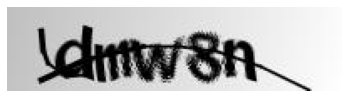

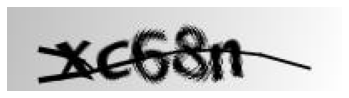

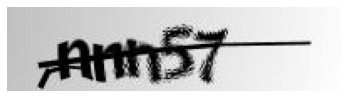

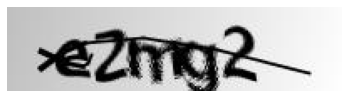

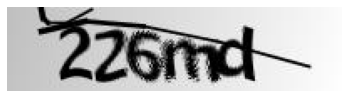

In [3]:
fig = plt.figure()
img=cv2.imread('images/samples/dmw8n.png')
plt.imshow(img)
plt.axis('off')

fig = plt.figure()
img=cv2.imread('images/samples/xc68n.png')
plt.imshow(img)
plt.axis('off')

fig = plt.figure()
img=cv2.imread('images/samples/nnn57.png')
plt.imshow(img)
plt.axis('off')

fig = plt.figure()
img=cv2.imread('images/samples/e2mg2.png')
plt.imshow(img)
plt.axis('off')

fig = plt.figure()
img=cv2.imread('images/samples/226md.png')
plt.imshow(img)
plt.axis('off')

plt.show()

In [4]:
symbols = string.ascii_lowercase + "0123456789"
num_symbols = len(symbols)
img_shape = (50, 200, 1)

In [5]:
###
#
# Preprocessamento dos Dados
#
###

def preprocess_data():
    
    n_samples = len(os.listdir('images/samples'))
    X = np.zeros((n_samples, 50, 200, 1))
    y = np.zeros((5, n_samples, num_symbols))

    for i, pic in enumerate(os.listdir('images/samples')):
        
        img = cv2.imread(os.path.join('images/samples', pic), cv2.IMREAD_GRAYSCALE)
        pic_target = pic[:-4] # retira o .png
        if len(pic_target) < 6:
            
            # Coloca o valor dos pixels entre 0 e 1
            img = img / 255.
            # Utiliza apenas o canal vermelho
            img = np.reshape(img, (50, 200, 1))
            # cada captcha possui 5 caracteres
            targs = np.zeros((5, num_symbols))
            
            # Seta a sequência de letras alvo
            for j, l in enumerate(pic_target):
                ind = symbols.find(l)
                targs[j, ind] = 1
                
            X[i] = img
            y[:, i] = targs

    return X, y

In [6]:

def create_net():

    # Camada de entrada
    img = layers.Input(shape=img_shape) 
    
    # Segunda camada - convolução com relu, podemos experimentar com sigma
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img)    
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 100x25
    
    # Terceira camada - convolução com relu, podemos experimentar com sigma
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 50x13
    
    # Quarta camada - convolução com relu, podemos experimentar com sigma
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3)
    
    # Camada de saída
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 25x7    
    flat = layers.Flatten()(mp3)
    
    outs = []
    for _ in range(5):
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1)
        res = layers.Dense(num_symbols, activation='sigmoid')(drop)

        outs.append(res)
    
    model = Model(img, outs)
    model.compile('rmsprop', loss=['categorical_crossentropy', 'categorical_crossentropy',
                                   'categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'])
    model.summary()
    return model


In [7]:
def predict(filepath):
    
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE) / 255.
    res = np.array(net.predict(img[np.newaxis, :, :, np.newaxis]))
    ans = np.reshape(res, (5, 36))
    l_ind = []
    probs = []
    
    for a in ans:
        l_ind.append(np.argmax(a))
        probs.append(np.max(a))

    capt = ''
    for l in l_ind:
        capt += symbols[l]
    return capt, sum(probs) / 5

In [8]:


X, y = preprocess_data()
X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]

net = create_net()
history = net.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=300, validation_split=0.2)

net.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]])

# Acertos e erros de teste:



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50, 200, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 50, 200, 16)  160         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 25, 100, 16)  0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 25, 100, 32)  4640        max_pooling2d[0][0]              
______________________________________________________________________________________________

25/25 [==============================] - 3s 120ms/step - loss: 5.7606 - dense_1_loss: 0.6443 - dense_3_loss: 0.9196 - dense_5_loss: 1.2680 - dense_7_loss: 1.4412 - dense_9_loss: 1.4874 - val_loss: 13.1575 - val_dense_1_loss: 2.4354 - val_dense_3_loss: 2.4274 - val_dense_5_loss: 2.7236 - val_dense_7_loss: 2.8471 - val_dense_9_loss: 2.7240
Epoch 10/300
25/25 [==============================] - 3s 136ms/step - loss: 4.6725 - dense_1_loss: 0.5033 - dense_3_loss: 0.6994 - dense_5_loss: 1.0619 - dense_7_loss: 1.1847 - dense_9_loss: 1.2232 - val_loss: 12.0091 - val_dense_1_loss: 2.1695 - val_dense_3_loss: 2.1261 - val_dense_5_loss: 2.5415 - val_dense_7_loss: 2.6475 - val_dense_9_loss: 2.5245
Epoch 11/300
25/25 [==============================] - 4s 141ms/step - loss: 3.8902 - dense_1_loss: 0.4065 - dense_3_loss: 0.6148 - dense_5_loss: 0.8213 - dense_7_loss: 0.9783 - dense_9_loss: 1.0693 - val_loss: 9.7920 - val_dense_1_loss: 1.5793 - val_dense_3_loss: 1.6066 - val_dense_5_loss: 2.0848 - val_den

25/25 [==============================] - 3s 137ms/step - loss: 0.4213 - dense_1_loss: 0.0402 - dense_3_loss: 0.0240 - dense_5_loss: 0.0960 - dense_7_loss: 0.1405 - dense_9_loss: 0.1206 - val_loss: 1.8845 - val_dense_1_loss: 0.0078 - val_dense_3_loss: 0.2186 - val_dense_5_loss: 0.4877 - val_dense_7_loss: 0.7853 - val_dense_9_loss: 0.3851
Epoch 33/300
25/25 [==============================] - 3s 129ms/step - loss: 0.4644 - dense_1_loss: 0.0748 - dense_3_loss: 0.0658 - dense_5_loss: 0.0922 - dense_7_loss: 0.1145 - dense_9_loss: 0.1171 - val_loss: 2.1158 - val_dense_1_loss: 0.0029 - val_dense_3_loss: 0.2469 - val_dense_5_loss: 0.5252 - val_dense_7_loss: 0.9280 - val_dense_9_loss: 0.4128
Epoch 34/300
25/25 [==============================] - 3s 131ms/step - loss: 0.3870 - dense_1_loss: 0.0656 - dense_3_loss: 0.0395 - dense_5_loss: 0.0718 - dense_7_loss: 0.1169 - dense_9_loss: 0.0933 - val_loss: 2.1025 - val_dense_1_loss: 0.0060 - val_dense_3_loss: 0.2762 - val_dense_5_loss: 0.5410 - val_dense

25/25 [==============================] - 3s 119ms/step - loss: 0.2414 - dense_1_loss: 0.0395 - dense_3_loss: 0.0445 - dense_5_loss: 0.0437 - dense_7_loss: 0.0530 - dense_9_loss: 0.0607 - val_loss: 2.0892 - val_dense_1_loss: 3.0559e-04 - val_dense_3_loss: 0.3102 - val_dense_5_loss: 0.5294 - val_dense_7_loss: 0.8233 - val_dense_9_loss: 0.4261
Epoch 56/300
25/25 [==============================] - 3s 119ms/step - loss: 0.2058 - dense_1_loss: 0.0335 - dense_3_loss: 0.0218 - dense_5_loss: 0.0463 - dense_7_loss: 0.0524 - dense_9_loss: 0.0518 - val_loss: 2.5274 - val_dense_1_loss: 7.3790e-04 - val_dense_3_loss: 0.3865 - val_dense_5_loss: 0.5150 - val_dense_7_loss: 1.0278 - val_dense_9_loss: 0.5974
Epoch 57/300
25/25 [==============================] - 3s 119ms/step - loss: 0.2415 - dense_1_loss: 0.0250 - dense_3_loss: 0.0239 - dense_5_loss: 0.0532 - dense_7_loss: 0.0737 - dense_9_loss: 0.0656 - val_loss: 2.1639 - val_dense_1_loss: 0.0116 - val_dense_3_loss: 0.3832 - val_dense_5_loss: 0.4919 - v

25/25 [==============================] - 4s 145ms/step - loss: 0.1201 - dense_1_loss: 0.0115 - dense_3_loss: 0.0213 - dense_5_loss: 0.0193 - dense_7_loss: 0.0366 - dense_9_loss: 0.0315 - val_loss: 1.8670 - val_dense_1_loss: 0.0070 - val_dense_3_loss: 0.2106 - val_dense_5_loss: 0.4911 - val_dense_7_loss: 0.7614 - val_dense_9_loss: 0.3969
Epoch 79/300
25/25 [==============================] - 3s 136ms/step - loss: 0.2027 - dense_1_loss: 0.0190 - dense_3_loss: 0.0301 - dense_5_loss: 0.0518 - dense_7_loss: 0.0665 - dense_9_loss: 0.0353 - val_loss: 1.8223 - val_dense_1_loss: 0.0151 - val_dense_3_loss: 0.2179 - val_dense_5_loss: 0.4863 - val_dense_7_loss: 0.7460 - val_dense_9_loss: 0.3570
Epoch 80/300
25/25 [==============================] - 4s 144ms/step - loss: 0.1003 - dense_1_loss: 0.0196 - dense_3_loss: 0.0187 - dense_5_loss: 0.0147 - dense_7_loss: 0.0212 - dense_9_loss: 0.0262 - val_loss: 2.1102 - val_dense_1_loss: 0.0143 - val_dense_3_loss: 0.3280 - val_dense_5_loss: 0.4389 - val_dense

25/25 [==============================] - 3s 125ms/step - loss: 0.1430 - dense_1_loss: 0.0189 - dense_3_loss: 0.0092 - dense_5_loss: 0.0343 - dense_7_loss: 0.0443 - dense_9_loss: 0.0362 - val_loss: 2.3473 - val_dense_1_loss: 0.0033 - val_dense_3_loss: 0.4577 - val_dense_5_loss: 0.4334 - val_dense_7_loss: 0.9182 - val_dense_9_loss: 0.5347
Epoch 102/300
25/25 [==============================] - 3s 129ms/step - loss: 0.2042 - dense_1_loss: 0.0177 - dense_3_loss: 0.0345 - dense_5_loss: 0.0326 - dense_7_loss: 0.0519 - dense_9_loss: 0.0675 - val_loss: 2.5624 - val_dense_1_loss: 0.0088 - val_dense_3_loss: 0.4777 - val_dense_5_loss: 0.4310 - val_dense_7_loss: 0.9943 - val_dense_9_loss: 0.6506
Epoch 103/300
25/25 [==============================] - 4s 142ms/step - loss: 0.1183 - dense_1_loss: 0.0203 - dense_3_loss: 0.0032 - dense_5_loss: 0.0279 - dense_7_loss: 0.0292 - dense_9_loss: 0.0377 - val_loss: 2.7924 - val_dense_1_loss: 0.0047 - val_dense_3_loss: 0.4793 - val_dense_5_loss: 0.6583 - val_den

25/25 [==============================] - 3s 115ms/step - loss: 0.0879 - dense_1_loss: 0.0116 - dense_3_loss: 0.0151 - dense_5_loss: 0.0152 - dense_7_loss: 0.0264 - dense_9_loss: 0.0195 - val_loss: 2.0398 - val_dense_1_loss: 0.0223 - val_dense_3_loss: 0.2714 - val_dense_5_loss: 0.5315 - val_dense_7_loss: 0.8560 - val_dense_9_loss: 0.3586
Epoch 125/300
25/25 [==============================] - 3s 114ms/step - loss: 0.1025 - dense_1_loss: 0.0097 - dense_3_loss: 0.0231 - dense_5_loss: 0.0190 - dense_7_loss: 0.0191 - dense_9_loss: 0.0318 - val_loss: 2.0355 - val_dense_1_loss: 0.0532 - val_dense_3_loss: 0.2241 - val_dense_5_loss: 0.4867 - val_dense_7_loss: 0.6693 - val_dense_9_loss: 0.6022
Epoch 126/300
25/25 [==============================] - 3s 115ms/step - loss: 0.1527 - dense_1_loss: 0.0122 - dense_3_loss: 0.0288 - dense_5_loss: 0.0343 - dense_7_loss: 0.0297 - dense_9_loss: 0.0477 - val_loss: 2.1323 - val_dense_1_loss: 4.5532e-04 - val_dense_3_loss: 0.2835 - val_dense_5_loss: 0.5927 - val

25/25 [==============================] - 3s 115ms/step - loss: 0.0833 - dense_1_loss: 0.0096 - dense_3_loss: 0.0051 - dense_5_loss: 0.0124 - dense_7_loss: 0.0367 - dense_9_loss: 0.0195 - val_loss: 2.9446 - val_dense_1_loss: 0.0046 - val_dense_3_loss: 0.4744 - val_dense_5_loss: 0.6400 - val_dense_7_loss: 1.1610 - val_dense_9_loss: 0.6647
Epoch 148/300
25/25 [==============================] - 3s 114ms/step - loss: 0.0750 - dense_1_loss: 0.0094 - dense_3_loss: 0.0048 - dense_5_loss: 0.0154 - dense_7_loss: 0.0270 - dense_9_loss: 0.0184 - val_loss: 2.5317 - val_dense_1_loss: 0.0031 - val_dense_3_loss: 0.3241 - val_dense_5_loss: 0.5400 - val_dense_7_loss: 1.0576 - val_dense_9_loss: 0.6069
Epoch 149/300
25/25 [==============================] - 3s 114ms/step - loss: 0.1004 - dense_1_loss: 0.0055 - dense_3_loss: 0.0129 - dense_5_loss: 0.0342 - dense_7_loss: 0.0268 - dense_9_loss: 0.0211 - val_loss: 2.3589 - val_dense_1_loss: 0.0028 - val_dense_3_loss: 0.3392 - val_dense_5_loss: 0.4482 - val_den

25/25 [==============================] - 3s 115ms/step - loss: 0.0769 - dense_1_loss: 0.0030 - dense_3_loss: 0.0032 - dense_5_loss: 0.0200 - dense_7_loss: 0.0275 - dense_9_loss: 0.0232 - val_loss: 2.3531 - val_dense_1_loss: 0.0143 - val_dense_3_loss: 0.3552 - val_dense_5_loss: 0.4731 - val_dense_7_loss: 1.0479 - val_dense_9_loss: 0.4627
Epoch 171/300
25/25 [==============================] - 3s 114ms/step - loss: 0.1045 - dense_1_loss: 0.0119 - dense_3_loss: 0.0079 - dense_5_loss: 0.0363 - dense_7_loss: 0.0143 - dense_9_loss: 0.0342 - val_loss: 2.3942 - val_dense_1_loss: 5.1197e-05 - val_dense_3_loss: 0.3946 - val_dense_5_loss: 0.4918 - val_dense_7_loss: 1.0790 - val_dense_9_loss: 0.4288
Epoch 172/300
25/25 [==============================] - 3s 114ms/step - loss: 0.0630 - dense_1_loss: 0.0087 - dense_3_loss: 0.0027 - dense_5_loss: 0.0062 - dense_7_loss: 0.0362 - dense_9_loss: 0.0092 - val_loss: 2.5306 - val_dense_1_loss: 4.1408e-05 - val_dense_3_loss: 0.3618 - val_dense_5_loss: 0.6052 -

25/25 [==============================] - 3s 115ms/step - loss: 0.0949 - dense_1_loss: 0.0057 - dense_3_loss: 0.0051 - dense_5_loss: 0.0372 - dense_7_loss: 0.0364 - dense_9_loss: 0.0105 - val_loss: 2.8623 - val_dense_1_loss: 0.0130 - val_dense_3_loss: 0.4589 - val_dense_5_loss: 1.0050 - val_dense_7_loss: 0.9683 - val_dense_9_loss: 0.4170
Epoch 194/300
25/25 [==============================] - 3s 114ms/step - loss: 0.0507 - dense_1_loss: 9.0897e-04 - dense_3_loss: 0.0034 - dense_5_loss: 0.0165 - dense_7_loss: 0.0092 - dense_9_loss: 0.0206 - val_loss: 2.0590 - val_dense_1_loss: 0.0045 - val_dense_3_loss: 0.3625 - val_dense_5_loss: 0.4326 - val_dense_7_loss: 0.9271 - val_dense_9_loss: 0.3323
Epoch 195/300
25/25 [==============================] - 3s 115ms/step - loss: 0.0881 - dense_1_loss: 0.0035 - dense_3_loss: 0.0157 - dense_5_loss: 0.0119 - dense_7_loss: 0.0467 - dense_9_loss: 0.0103 - val_loss: 2.1614 - val_dense_1_loss: 0.0053 - val_dense_3_loss: 0.3451 - val_dense_5_loss: 0.4105 - val

25/25 [==============================] - 3s 116ms/step - loss: 0.0534 - dense_1_loss: 0.0062 - dense_3_loss: 0.0061 - dense_5_loss: 0.0080 - dense_7_loss: 0.0212 - dense_9_loss: 0.0120 - val_loss: 2.8083 - val_dense_1_loss: 0.0167 - val_dense_3_loss: 0.3922 - val_dense_5_loss: 0.8107 - val_dense_7_loss: 0.8851 - val_dense_9_loss: 0.7036
Epoch 217/300
25/25 [==============================] - 3s 115ms/step - loss: 0.1001 - dense_1_loss: 0.0028 - dense_3_loss: 0.0071 - dense_5_loss: 0.0256 - dense_7_loss: 0.0155 - dense_9_loss: 0.0491 - val_loss: 2.2823 - val_dense_1_loss: 0.0356 - val_dense_3_loss: 0.3906 - val_dense_5_loss: 0.4790 - val_dense_7_loss: 0.9013 - val_dense_9_loss: 0.4758
Epoch 218/300
25/25 [==============================] - 3s 115ms/step - loss: 0.0953 - dense_1_loss: 0.0030 - dense_3_loss: 0.0190 - dense_5_loss: 0.0209 - dense_7_loss: 0.0306 - dense_9_loss: 0.0218 - val_loss: 2.1516 - val_dense_1_loss: 0.0282 - val_dense_3_loss: 0.2537 - val_dense_5_loss: 0.5601 - val_den

25/25 [==============================] - 3s 115ms/step - loss: 0.0733 - dense_1_loss: 0.0138 - dense_3_loss: 0.0042 - dense_5_loss: 0.0268 - dense_7_loss: 0.0065 - dense_9_loss: 0.0221 - val_loss: 2.1938 - val_dense_1_loss: 0.0041 - val_dense_3_loss: 0.3245 - val_dense_5_loss: 0.4815 - val_dense_7_loss: 0.9226 - val_dense_9_loss: 0.4611
Epoch 240/300
25/25 [==============================] - 3s 114ms/step - loss: 0.0572 - dense_1_loss: 0.0156 - dense_3_loss: 0.0026 - dense_5_loss: 0.0057 - dense_7_loss: 0.0251 - dense_9_loss: 0.0082 - val_loss: 2.4307 - val_dense_1_loss: 0.0514 - val_dense_3_loss: 0.3463 - val_dense_5_loss: 0.5873 - val_dense_7_loss: 0.8847 - val_dense_9_loss: 0.5610
Epoch 241/300
25/25 [==============================] - 3s 115ms/step - loss: 0.0593 - dense_1_loss: 0.0089 - dense_3_loss: 0.0080 - dense_5_loss: 0.0093 - dense_7_loss: 0.0144 - dense_9_loss: 0.0187 - val_loss: 3.5809 - val_dense_1_loss: 0.0054 - val_dense_3_loss: 0.6682 - val_dense_5_loss: 0.9500 - val_den

25/25 [==============================] - 3s 115ms/step - loss: 0.0568 - dense_1_loss: 0.0107 - dense_3_loss: 0.0116 - dense_5_loss: 0.0074 - dense_7_loss: 0.0079 - dense_9_loss: 0.0191 - val_loss: 2.8145 - val_dense_1_loss: 0.0148 - val_dense_3_loss: 0.2976 - val_dense_5_loss: 0.6001 - val_dense_7_loss: 1.2910 - val_dense_9_loss: 0.6109
Epoch 263/300
25/25 [==============================] - 3s 115ms/step - loss: 0.0808 - dense_1_loss: 0.0107 - dense_3_loss: 0.0081 - dense_5_loss: 0.0230 - dense_7_loss: 0.0149 - dense_9_loss: 0.0241 - val_loss: 2.4113 - val_dense_1_loss: 0.0265 - val_dense_3_loss: 0.3392 - val_dense_5_loss: 0.4239 - val_dense_7_loss: 1.1443 - val_dense_9_loss: 0.4774
Epoch 264/300
25/25 [==============================] - 3s 114ms/step - loss: 0.0465 - dense_1_loss: 0.0108 - dense_3_loss: 0.0122 - dense_5_loss: 0.0041 - dense_7_loss: 0.0125 - dense_9_loss: 0.0068 - val_loss: 1.7798 - val_dense_1_loss: 0.0180 - val_dense_3_loss: 0.1898 - val_dense_5_loss: 0.4151 - val_den

25/25 [==============================] - 3s 114ms/step - loss: nan - dense_1_loss: nan - dense_3_loss: nan - dense_5_loss: nan - dense_7_loss: nan - dense_9_loss: nan - val_loss: nan - val_dense_1_loss: nan - val_dense_3_loss: nan - val_dense_5_loss: nan - val_dense_7_loss: nan - val_dense_9_loss: nan
Epoch 286/300
25/25 [==============================] - 3s 113ms/step - loss: nan - dense_1_loss: nan - dense_3_loss: nan - dense_5_loss: nan - dense_7_loss: nan - dense_9_loss: nan - val_loss: nan - val_dense_1_loss: nan - val_dense_3_loss: nan - val_dense_5_loss: nan - val_dense_7_loss: nan - val_dense_9_loss: nan
Epoch 287/300
25/25 [==============================] - 3s 113ms/step - loss: nan - dense_1_loss: nan - dense_3_loss: nan - dense_5_loss: nan - dense_7_loss: nan - dense_9_loss: nan - val_loss: nan - val_dense_1_loss: nan - val_dense_3_loss: nan - val_dense_5_loss: nan - val_dense_7_loss: nan - val_dense_9_loss: nan
Epoch 288/300
25/25 [==============================] - 3s 112ms

[nan, nan, nan, nan, nan, nan]

In [11]:

print('8n5p3', predict('images/samples/8n5p3.png'))
print('f2m8n', predict('images/samples/f2m8n.png'))
print('dce8y', predict('images/samples/dce8y.png'))
print('3eny7', predict('images/samples/3eny7.png'))
print('npxb7', predict('images/samples/npxb7.png'))

8n5p3 ('aaaaa', nan)
f2m8n ('aaaaa', nan)
dce8y ('aaaaa', nan)
3eny7 ('aaaaa', nan)
npxb7 ('aaaaa', nan)
